# Datos

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("/home/rahul/data/graphindoorlocal/My_work/UJIndoorLoc/UJIndoorLoc/trainingData.csv")
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,x,y,x_scaled,y_scaled
0,0,0,0,0,0,0,0,0,0,0,...,1,106,2,2,23,1371713733,715398.093448,5.392590e+06,-56.230829,51.547814
1,0,0,0,0,0,0,0,0,0,0,...,1,106,2,2,23,1371713691,715400.939587,5.392605e+06,-53.384690,66.623963
2,0,0,0,0,0,0,0,7,0,0,...,1,103,2,2,23,1371714095,715413.151558,5.392622e+06,-41.172719,84.129571
3,0,0,0,0,0,0,0,0,0,0,...,1,102,2,2,23,1371713807,715409.819729,5.392605e+06,-44.504548,66.817394
4,0,0,0,0,0,0,0,0,0,0,...,0,122,2,11,13,1369909710,715328.549585,5.392655e+06,-125.774691,117.264838


In [3]:
missing = 0.4
if missing > 0:
    df = df.sample(frac=1-missing, random_state=42)

In [4]:
df['CLASS'] = df['BUILDINGID'].astype(str) + df['FLOOR'].astype(str)

In [5]:
df.groupby('CLASS').count()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,x,y,x_scaled,y_scaled
CLASS,,,,,,,,,,,,,,,,,,,,,
00,644,644,644,644,644,644,644,644,644,644,...,644,644,644,644,644,644,644,644,644,644
01,805,805,805,805,805,805,805,805,805,805,...,805,805,805,805,805,805,805,805,805,805
02,892,892,892,892,892,892,892,892,892,892,...,892,892,892,892,892,892,892,892,892,892
03,826,826,826,826,826,826,826,826,826,826,...,826,826,826,826,826,826,826,826,826,826
10,844,844,844,844,844,844,844,844,844,844,...,844,844,844,844,844,844,844,844,844,844
11,881,881,881,881,881,881,881,881,881,881,...,881,881,881,881,881,881,881,881,881,881
12,848,848,848,848,848,848,848,848,848,848,...,848,848,848,848,848,848,848,848,848,848
13,542,542,542,542,542,542,542,542,542,542,...,542,542,542,542,542,542,542,542,542,542
20,1158,1158,1158,1158,1158,1158,1158,1158,1158,1158,...,1158,1158,1158,1158,1158,1158,1158,1158,1158,1158


In [6]:
df_X = df.iloc[:,:520]
df_y = df['CLASS']
print(df_X.shape)

df_X.describe()

(11962, 520)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,11962.000000,11962.000000,11962.0,11962.0,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,...,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.0
mean,0.007189,0.014212,0.0,0.0,0.022655,0.289918,0.676559,0.740846,0.776124,0.054506,...,1.894499,0.012456,0.131249,0.120214,0.047567,4.694616,6.375104,0.016469,0.001421,0.0
std,0.250304,0.472077,0.0,0.0,0.513578,2.470130,4.333494,4.364224,4.754789,0.861365,...,7.217609,0.453243,1.748743,1.573629,0.895321,12.490449,13.059669,0.481039,0.111603,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,10.000000,18.000000,0.0,0.0,15.000000,44.000000,57.000000,43.000000,54.000000,20.000000,...,91.000000,19.000000,34.000000,37.000000,22.000000,104.000000,104.000000,17.000000,10.000000,0.0


In [7]:
df_X['CLASS'] = df_y.values 

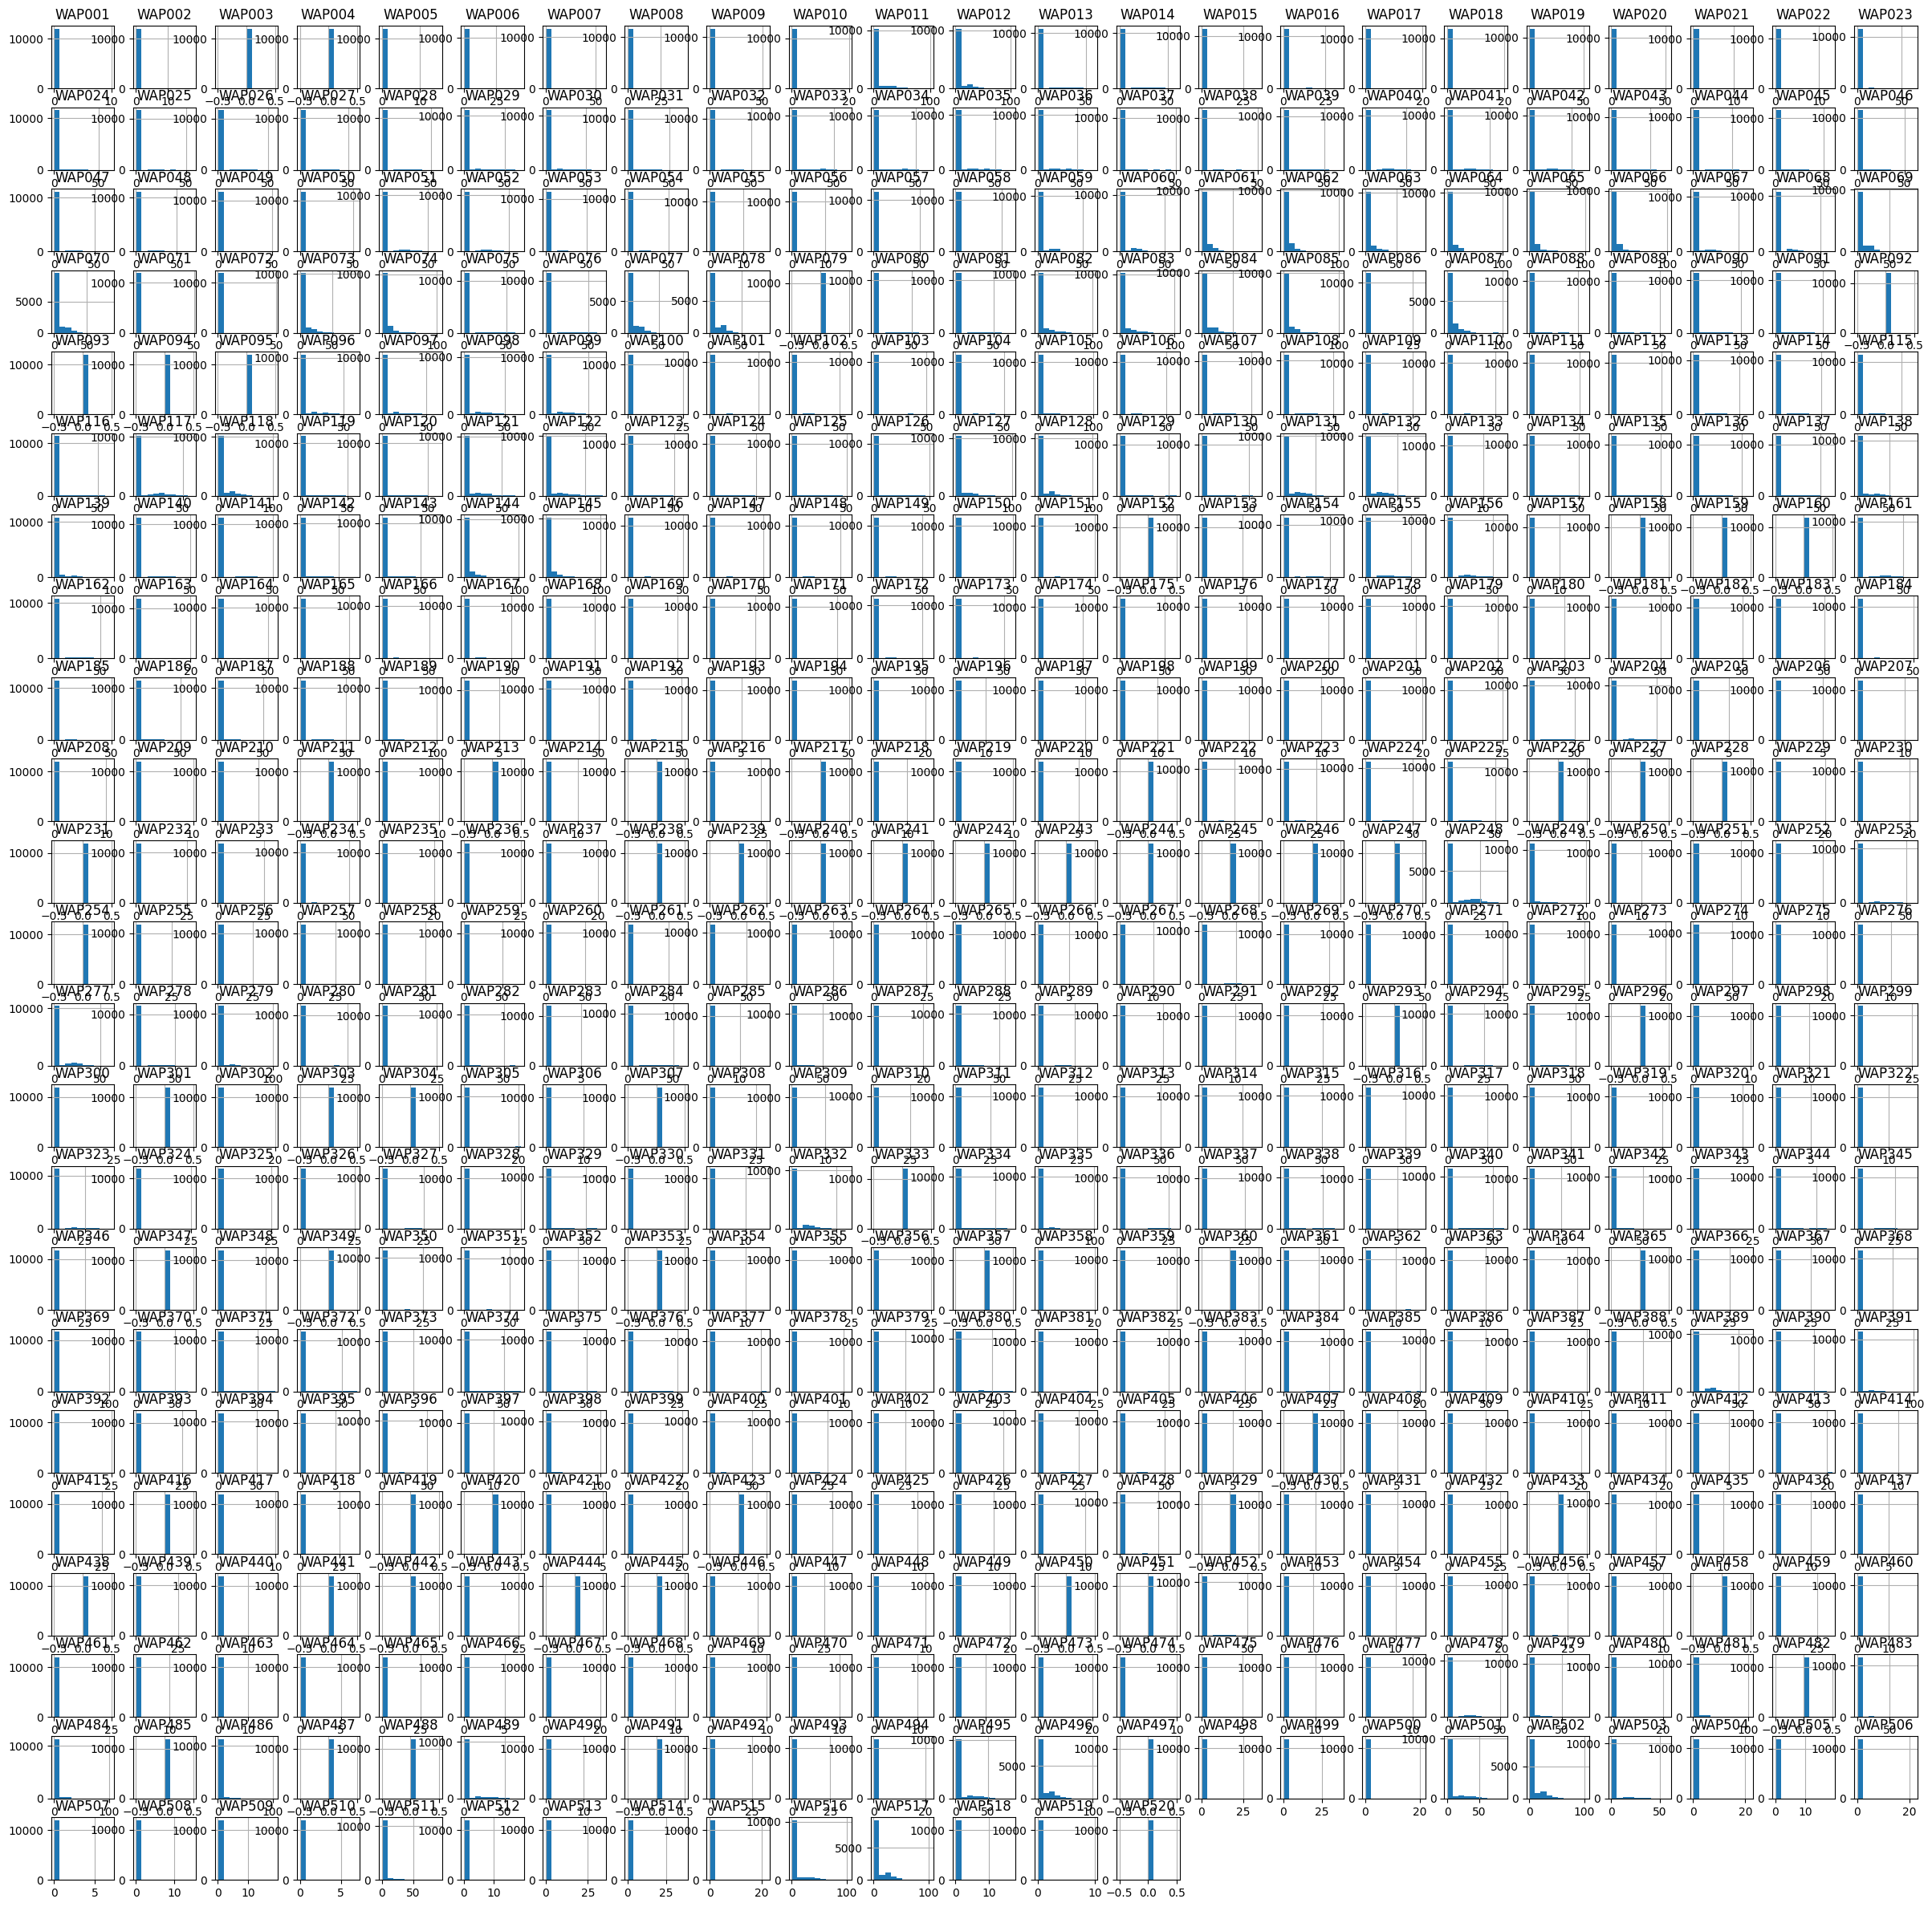

In [8]:
df_X.hist(figsize=[30,30])
plt.show()

In [9]:
import networkx as nx
import alegnn.modules.architectures as architectures
import alegnn.utils.graphML as graphML
# no sé porqué le cambian los parámetros por defecto a pyplot... por lo menos le saco el latex que en colab no funciona por defecto.
# plt.rcParams.update({"text.usetex": False})

import torch

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [10]:
import torch
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int32)
y = enc.fit_transform(df_X['CLASS'].values.reshape(-1,1))
X = df_X.iloc[:,:-1].values

In [11]:
import networkx as nx

def graph_creator(X_G, columns, th=10):
  df_data_train = pd.DataFrame(X_G, columns=columns)
  df_G = pd.DataFrame(columns = ['from', 'to', 'weight']) 

  for i in df_X.columns[:-1]:
    max_val = df_data_train[i].max()
    df_aux_i = df_data_train[df_data_train[i]  > (max_val - th)]
    df_aux_i = df_aux_i.drop(i, axis=1) 
    df_aux_i.head()

  for k, v in df_aux_i.mean().items():
    df_G.loc[len(df_G.index)] = [i, k, v] #append({'from':i, 'to': k, 'weight': v}, ignore_index=True)

  G = nx.from_pandas_edgelist(df_G, source='from', target='to', edge_attr='weight')  # create_using=nx.DiGraph

  W = nx.to_numpy_array(G)
  # por último le saco la diagonal y la normalizo por su vector propio más grande
  np.fill_diagonal(W,0)
  (w,v) = scipy.sparse.linalg.eigs(W, k=1,which='LM')
  W = W/np.abs(w[0])

  return G, W

In [12]:
def train_model_simple(model, train_data, test_data, batch_size=32, n_epochs=100, epsilon=0.005, weight_decay=1e-2):
    
  optimizer = torch.optim.Adam(model.parameters(), lr=epsilon, weight_decay=weight_decay)

  train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=False)
  loss = torch.nn.CrossEntropyLoss()
  for epoch in range(n_epochs):
      for x_batch, y_batch in train_loader:
        if y_batch.shape[0] == batch_size:
          model.zero_grad()
          y_hat = model(x_batch)
          loss_result = loss(y_hat, y_batch.reshape(batch_size).type(torch.long))
          loss_result.backward()
          optimizer.step()
        else:
          break

  for x_batch, y_batch in test_loader:
      y_hattest = model(x_batch)
    
  return (model, y_hattest)

In [13]:
def train_model_simple(model, train_data, test_data, batch_size=32, n_epochs=100, epsilon=0.005, weight_decay=1e-2):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)  # Move model to GPU if available
    
    optimizer = torch.optim.Adam(model.parameters(), lr=epsilon, weight_decay=weight_decay)

    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=False)
    loss = torch.nn.CrossEntropyLoss()
    
    for epoch in range(n_epochs):
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move data to GPU
            
            if y_batch.shape[0] == batch_size:
                optimizer.zero_grad()
                y_hat = model(x_batch)
                loss_result = loss(y_hat, y_batch.reshape(batch_size).type(torch.long))
                loss_result.backward()
                optimizer.step()
            else:
                break

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move data to GPU
            y_hattest = model(x_batch)
    
    return model, y_hattest

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
import scipy
from sklearn.preprocessing import StandardScaler

In [15]:
k=5

kf = KFold(n_splits=k)

lr_list = [1e-3, 1e-4]
bs_list = [64, 128] 
wd_list = [1e-3, 1e-4]
n_fil = [1, 3, 5]

param_grid = {'lr': lr_list, 'bs': bs_list, 'wd': wd_list, 'nfil': n_fil}

best_score = 0
best_params = None

columns = df_X.columns[:-1]

nodos = len(columns)

output_len = len(df_X['CLASS'].value_counts())

epochs = 20

In [16]:
for param in list(ParameterGrid(param_grid)):

  ACC = 0
  for train_index, val_index in kf.split(X):
    X_train_cv, X_val_cv = X[train_index], X[val_index]
    y_train_cv, y_val_cv = y[train_index], y[val_index]

    Graph, W = graph_creator(X_train_cv[:,:nodos+1], columns, th=10) #el grafo lo armo solo con los datos de 2.4Ghz
    gnn_model = architectures.SelectionGNN(dimNodeSignals=[1, 20, 20], nFilterTaps=[param['nfil'],param['nfil']], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[nodos, nodos], poolingFunction=graphML.NoPool, poolingSize=[1, 1], dimLayersMLP=[output_len], GSO=torch.from_numpy(W).float())

    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_val_cv = scaler.transform(X_val_cv)

    x_training_data = np.reshape(X_train_cv,(X_train_cv.shape[0],1,nodos))
    x_val_data = np.reshape(X_val_cv,(X_val_cv.shape[0],1,nodos))
    y_training_data = np.reshape(y_train_cv,(y_train_cv.shape[0],1,1))
    y_val_data = np.reshape(y_val_cv,(y_val_cv.shape[0],1,1))

    train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
    val_data = torch.utils.data.TensorDataset(torch.from_numpy(x_val_data).float(), torch.from_numpy(y_val_data).float())

    trained_gnn_model, y_pred = train_model_simple(gnn_model, train_data, val_data, n_epochs=epochs, epsilon=param['lr'], batch_size=param['bs'], weight_decay=param['wd'])

    m = torch.nn.Softmax(dim=1)
    output = m(y_pred)
    ACC += accuracy_score(y_val_cv, np.array(torch.argmax(output, axis=1).cpu()))/k

  if ACC > best_score:
      best_score = ACC
      best_params = param

  print("params: ", param)
  print("Accuracy: ", ACC) 
  print()

print("----------- BEST PARAMS --------------")
print("params: ", best_params)
print("Accuracy: ", best_score) 
print()


# experiment.log_parameters({'tag': 'ujiindoorloc FLOORS', 'epochs': epochs, 'nodes': nodos, 'class_len': output_len, 'dimNodeSignals':[1, 20, 20]})
# experiment.log_parameters(best_params)
# experiment.log_metrics({"accuracy_val": best_score})

params:  {'bs': 64, 'lr': 0.001, 'nfil': 1, 'wd': 0.001}
Accuracy:  0.9902189985562685

params:  {'bs': 64, 'lr': 0.001, 'nfil': 1, 'wd': 0.0001}
Accuracy:  0.9903858382936854

params:  {'bs': 64, 'lr': 0.001, 'nfil': 3, 'wd': 0.001}
Accuracy:  0.9884628661913858

params:  {'bs': 64, 'lr': 0.001, 'nfil': 3, 'wd': 0.0001}
Accuracy:  0.9900516696552234

params:  {'bs': 64, 'lr': 0.001, 'nfil': 5, 'wd': 0.001}
Accuracy:  0.9881284529711101

params:  {'bs': 64, 'lr': 0.001, 'nfil': 5, 'wd': 0.0001}
Accuracy:  0.989466629956101

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 1, 'wd': 0.001}
Accuracy:  0.9922252332961103

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 1, 'wd': 0.0001}
Accuracy:  0.9918909598368709

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 3, 'wd': 0.001}
Accuracy:  0.9916401586567287

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 3, 'wd': 0.0001}
Accuracy:  0.9910549442563106

params:  {'bs': 64, 'lr': 0.0001, 'nfil': 5, 'wd': 0.001}
Accuracy:  0.9917237706968625

params:  {'bs': 64, 'lr

# Test

In [17]:
df_test = pd.read_csv("/home/rahul/data/graphindoorlocal/My_work/UJIndoorLoc/UJIndoorLoc/validationData.csv")
df_test.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,x,y,x_scaled,y_scaled
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1380872703,715418.086367,5.392556e+06,-36.237909,17.682155
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,13,1381155054,715517.460777,5.392504e+06,63.136500,-34.071298
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,13,1381155095,715524.215195,5.392512e+06,69.890918,-26.250794
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,13,1381155138,715530.616109,5.392508e+06,76.291832,-30.128385
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1380877774,715324.208647,5.392588e+06,-130.115630,50.518961


In [18]:
df_test['CLASS'] = df_test['BUILDINGID'].astype(str) + df_test['FLOOR'].astype(str)

In [19]:
df_X_test = df_test.iloc[:,:520]
df_y_test = df_test['CLASS']
print(df_X_test.shape)

df_X_test['CLASS'] = df_y_test.values 

df_X_test.describe()

(1111, 520)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,1111.000000,1111.0,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1111.000000,1111.00000,...,1111.0,1111.0,1111.0,1111.0,1111.0,1111.0,1111.0,1111.0,1111.0,1111.000000
mean,0.096310,0.0,0.032403,0.032403,0.0,0.0,0.0,0.540054,1.305131,0.09721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027003
std,1.165841,0.0,0.764549,0.768076,0.0,0.0,0.0,3.409310,5.925632,1.26971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900045
min,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,19.000000,0.0,19.000000,20.000000,0.0,0.0,0.0,42.000000,45.000000,20.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000


In [20]:
import torch

In [21]:
escaler = StandardScaler()
X = escaler.fit_transform(X)

y_test = enc.transform(df_X_test['CLASS'].values.reshape(-1,1))
X_test = df_X_test.iloc[:,:-1].values
X_test = escaler.transform(X_test)

x_training_data = np.reshape(X,(X.shape[0],1,nodos))
x_test_data = np.reshape(X_test,(X_test.shape[0],1,nodos))
y_training_data = np.reshape(y,(y.shape[0],1,1))
y_test_data = np.reshape(y_test,(y_test.shape[0],1,1))

train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
test_data = torch.utils.data.TensorDataset(torch.from_numpy(x_test_data).float(), torch.from_numpy(y_test_data).float())

In [22]:
Graph, W = graph_creator(X[:,:nodos+1], columns, th=10)

gnn_model = architectures.SelectionGNN(dimNodeSignals=[1, 20, 20], nFilterTaps=[best_params['nfil'],best_params['nfil']], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[nodos, nodos], poolingFunction=graphML.NoPool, poolingSize=[nodos, nodos], dimLayersMLP=[output_len], GSO=torch.from_numpy(W).float())

(trained_gnn_model, y_hattest) = train_model_simple(gnn_model, train_data, test_data, n_epochs=epochs, epsilon=best_params['lr'], batch_size=best_params['bs'], weight_decay=best_params['wd'])

m = torch.nn.Softmax(dim=1)
output = m(y_hattest)   
ACC_test = accuracy_score(y_test, np.array(torch.argmax(output, axis=1).cpu()))

print(ACC_test)

# experiment.log_metrics({"accuracy_test": ACC_test})

0.9027902790279028
